In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import matplotlib.pyplot as plt

import seaborn as sns
import wrangle
import env
import evaluate

In [3]:
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [4]:
train, validate, test = wrangle.my_train_test_split(df)
train.shape, validate.shape, test.shape

((1038469, 7), (445059, 7), (370883, 7))

In [5]:
train.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips
894604,4.0,2.0,1694.0,393986.0,1972.0,5289.08,6111.0
221576,3.0,3.0,2284.0,411257.0,1990.0,5242.36,6037.0
2076710,3.0,2.5,1799.0,79563.0,1968.0,766.38,6059.0
1051549,3.0,1.0,1024.0,50267.0,1949.0,899.90,6037.0
1575944,2.0,1.0,660.0,120734.0,1924.0,1533.73,6037.0


In [6]:
X_train, X_validate = train[['area']], validate[['area']]
y_train, y_validate = train.tax_value, validate.tax_value

In [8]:
train = train.drop(columns=['bedrooms','bathrooms', 'yearbuilt','taxamount', 'fips'])

In [9]:
train.head()

,area,tax_value
894604,1694.0,393986.0
221576,2284.0,411257.0
2076710,1799.0,79563.0
1051549,1024.0,50267.0
1575944,660.0,120734.0


In [10]:
baseline = y_train.mean()

In [11]:
train['baseline'] = baseline

In [12]:
train.head()

,area,tax_value,baseline
894604,1694.0,393986.0,327853.46165
221576,2284.0,411257.0,327853.46165
2076710,1799.0,79563.0,327853.46165
1051549,1024.0,50267.0,327853.46165
1575944,660.0,120734.0,327853.46165


In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
train['yhat'] = lm.predict(X_train)
train.head()

,area,tax_value,baseline,yhat
894604,1694.0,393986.0,327853.46165,333849.620701
221576,2284.0,411257.0,327853.46165,421884.642833
2076710,1799.0,79563.0,327853.46165,349516.870403
1051549,1024.0,50267.0,327853.46165,233877.646416
1575944,660.0,120734.0,327853.46165,179564.514117


In [16]:
train['baseline_residual'] = y_train - train.baseline
train['residual'] = y_train - train.yhat
train.head()

,area,tax_value,baseline,yhat,baseline_residual,residual
894604,1694.0,393986.0,327853.46165,333849.620701,66132.53835,60136.379299
221576,2284.0,411257.0,327853.46165,421884.642833,83403.53835,-10627.642833
2076710,1799.0,79563.0,327853.46165,349516.870403,-248290.46165,-269953.870403
1051549,1024.0,50267.0,327853.46165,233877.646416,-277586.46165,-183610.646416
1575944,660.0,120734.0,327853.46165,179564.514117,-207119.46165,-58830.514117


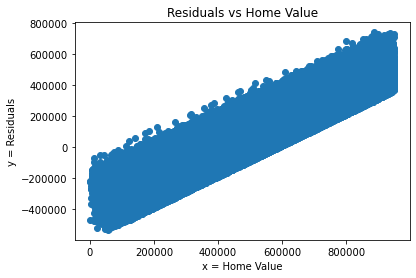

In [17]:
evaluate.plot_residuals(y_train, train.yhat)

In [18]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(y_train, train.yhat)

In [19]:
print(f'SSE = {SSE}')
print(f'ESS = {ESS}')
print(f'TSS = {TSS}')
print(f'MSE = {MSE}')
print(f'RMSE = {RMSE}')


SSE = 3.3725163602397584e+16
ESS = 7367159462754288.0
TSS = 4.109232306515187e+16
MSE = 32475850123.978264
RMSE = 180210.57162102967


In [20]:
SSE_baseline, MSE_baseline, RMSE_baseline = evaluate.baseline_mean_errors(y_train)

In [21]:
print(f'SSE_basline = {SSE_baseline}')
print(f'MSE_baseline = {MSE_baseline}')
print(f'RMSE_baseline = {RMSE_baseline}')

SSE_basline = 4.109232306515187e+16
MSE_baseline = 39570100855.34751
RMSE_baseline = 198922.3488081405


In [22]:
if SSE < SSE_baseline:
    print('My OSL model better than baseline!')
else:
    print('My OSL model is not better than baseline!')

My OSL model better than baseline!


In [23]:
evaluate.better_than_baseline(y_train, train.yhat)

True

In [27]:
X_train, model = evaluate.x_train_feats(train, y_train)

In [28]:
X_train

,area,tax_value,baseline,yhat,baseline_residual,residual
894604,1694.0,393986.0,327853.46165,333849.620701,66132.53835,60136.379299
221576,2284.0,411257.0,327853.46165,421884.642833,83403.53835,-10627.642833
2076710,1799.0,79563.0,327853.46165,349516.870403,-248290.46165,-269953.870403
1051549,1024.0,50267.0,327853.46165,233877.646416,-277586.46165,-183610.646416
1575944,660.0,120734.0,327853.46165,179564.514117,-207119.46165,-58830.514117
...,...,...,...,...,...,...
51283,2565.0,700000.0,327853.46165,463813.187273,372146.53835,236186.812727
979022,1812.0,71447.0,327853.46165,351456.625128,-256406.46165,-280009.625128
1102170,2684.0,300298.0,327853.46165,481569.403601,-27555.46165,-181271.403601
1089315,1347.0,426200.0,327853.46165,282073.090735,98346.53835,144126.909265


In [44]:
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [45]:
train, validate, test = wrangle.my_train_test_split(df)
train.shape, validate.shape, test.shape

((1038469, 7), (445059, 7), (370883, 7))

In [46]:
train['baseline'] = baseline

In [47]:
train.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips,baseline
894604,4.0,2.0,1694.0,393986.0,1972.0,5289.08,6111.0,327853.46165
221576,3.0,3.0,2284.0,411257.0,1990.0,5242.36,6037.0,327853.46165
2076710,3.0,2.5,1799.0,79563.0,1968.0,766.38,6059.0,327853.46165
1051549,3.0,1.0,1024.0,50267.0,1949.0,899.90,6037.0,327853.46165
1575944,2.0,1.0,660.0,120734.0,1924.0,1533.73,6037.0,327853.46165


In [48]:
X_train, X_validate = train[['area', 'taxamount']], validate[['area', 'taxamount']]

In [50]:
model = LinearRegression()

model.fit(X_train, train.tax_value)

LinearRegression()

In [51]:
train['yhat'] = model.predict(X_train)
train.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips,baseline,yhat
894604,4.0,2.0,1694.0,393986.0,1972.0,5289.08,6111.0,327853.46165,432219.501181
221576,3.0,3.0,2284.0,411257.0,1990.0,5242.36,6037.0,327853.46165,432994.757351
2076710,3.0,2.5,1799.0,79563.0,1968.0,766.38,6059.0,327853.46165,47682.783052
1051549,3.0,1.0,1024.0,50267.0,1949.0,899.90,6037.0,327853.46165,52812.445329
1575944,2.0,1.0,660.0,120734.0,1924.0,1533.73,6037.0,327853.46165,103887.247909


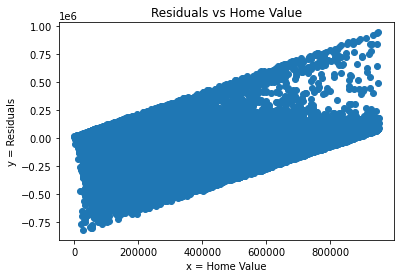

In [52]:
evaluate.plot_residuals(y_train, train.yhat)

In [53]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(y_train, train.yhat)

In [54]:
print(f'SSE = {SSE}')
print(f'ESS = {ESS}')
print(f'TSS = {TSS}')
print(f'MSE = {MSE}')
print(f'RMSE = {RMSE}')

SSE = 2431152354499814.5
ESS = 3.8661170710652056e+16
TSS = 4.109232306515187e+16
MSE = 2341092853.517837
RMSE = 48384.84115420694


In [55]:
SSE_baseline, MSE_baseline, RMSE_baseline = evaluate.baseline_mean_errors(y_train)

In [56]:
print(f'SSE_basline = {SSE_baseline}')
print(f'MSE_baseline = {MSE_baseline}')
print(f'RMSE_baseline = {RMSE_baseline}')

SSE_basline = 4.109232306515187e+16
MSE_baseline = 39570100855.34751
RMSE_baseline = 198922.3488081405


In [57]:
evaluate.better_than_baseline(y_train, train.yhat)

True

In [58]:
new_r2 = r2_score(y_train, train.yhat)
new_r2

0.9408368236897869